In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dt_clf = DecisionTreeClassifier(random_state=156)

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

dt_clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=156)

In [2]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names, 
                feature_names=iris_data.feature_names, impurity=True, filled=True)


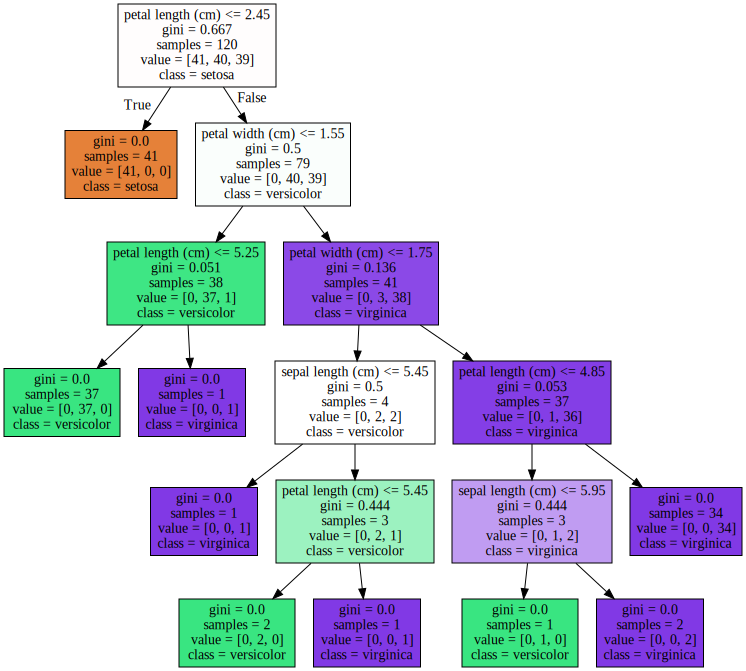

In [3]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importance: [0.02500521 0.         0.55490281 0.42009198]
sepal length (cm) 0.02500520941862888
sepal width (cm) 0.0
petal length (cm) 0.5549028149313102
petal width (cm) 0.42009197565006084


<AxesSubplot:>

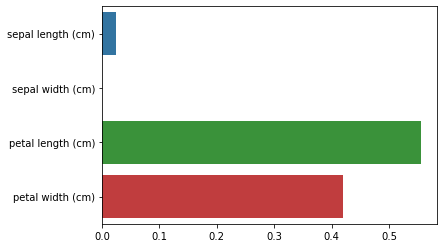

In [9]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print('Feature importance:', dt_clf.feature_importances_)

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print(name, value)

# 시각화
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

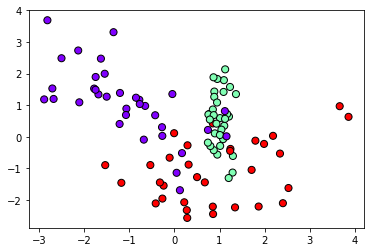

In [18]:
# overfitting issue
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline 

# feature는 2개, class는 3개 
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                          n_classes=3, n_clusters_per_class=1, random_state=0)

plt.scatter(X_features[:, 0], X_features[:,1], marker='o', c=y_labels, s=50, cmap='rainbow', edgecolor='k')

In [24]:
import numpy as np

def visualize_boundary(model, X, y):
    fig, ax = plt.subplots()
    
    ax.scatter(X[:,0], X[:,1], c=y, s=50, cmap='rainbow', edgecolor='k',
              clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()
    
    model.fit(X, y)
    
    xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num=200), np.linspace(ylim_start, ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    print(np.unique(y))
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3, levels = np.arange(n_classes+1) - 0.5,
                          cmap='rainbow', clim=(y.min(), y.max()), zorder=1)

[0 1 2]


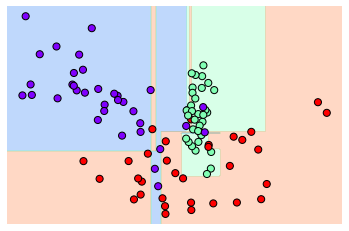

In [25]:
# abnormal한 dot들로 경계가 이상해짐
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

[0 1 2]


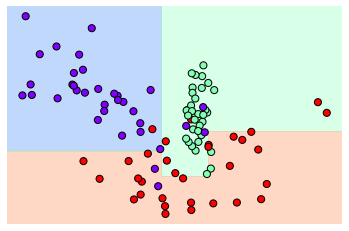

In [33]:
# 트리 제약을 걸면 분류가 더 잘되는걸 볼 수 있음
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

In [35]:
# 결정트리 실습
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# \s+ : 단어 사이의 공백 전체를 의미, features.txt를 df으로 로드
feature_name_df = pd.read_csv('./human_activity/features.txt', sep='\s+', 
                              header=None, names=['column_index', 'column_name'] )

feature_name = feature_name_df.iloc[:, 1].values.tolist()
print(feature_name[:10])
feature_name_df.head(20)

['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
5,6,tBodyAcc-std()-Z
6,7,tBodyAcc-mad()-X
7,8,tBodyAcc-mad()-Y
8,9,tBodyAcc-mad()-Z
9,10,tBodyAcc-max()-X


In [41]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1])
                                                                                             if x[1]>0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df     

In [42]:
pd.options.display.max_rows = 999
new_feature_name_df = get_new_feature_name_df(feature_name_df)
new_feature_name_df[new_feature_name_df['dup_cnt']>0]

,column_index,column_name,dup_cnt
316,317,"fBodyAcc-bandsEnergy()-1,8_1",1
317,318,"fBodyAcc-bandsEnergy()-9,16_1",1
318,319,"fBodyAcc-bandsEnergy()-17,24_1",1
319,320,"fBodyAcc-bandsEnergy()-25,32_1",1
320,321,"fBodyAcc-bandsEnergy()-33,40_1",1
321,322,"fBodyAcc-bandsEnergy()-41,48_1",1
322,323,"fBodyAcc-bandsEnergy()-49,56_1",1
323,324,"fBodyAcc-bandsEnergy()-57,64_1",1
324,325,"fBodyAcc-bandsEnergy()-1,16_1",1
325,326,"fBodyAcc-bandsEnergy()-17,32_1",1


In [44]:
import pandas as pd

def get_human_dataset():
    feature_name_df = pd.read_csv('./human_activity/features.txt', sep='\s+', 
                              header=None, names=['column_index', 'column_name'] )
    
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    X_train = pd.read_csv('./human_activity/train/X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('./human_activity/test/X_test.txt', sep='\s+', names=feature_name)
    
    y_train = pd.read_csv('./human_activity/train/y_train.txt', sep='\s+', names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt', sep='\s+', names=['action'])
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()   
    

In [45]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [46]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [49]:
X_train.isna().sum().sum()

0

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)
print()
print(dt_clf.get_params())

0.8547675602307431

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 156, 'splitter': 'best'}


In [53]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [ 6, 8 ,10, 12, 16 ,20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.3min finished


GridSearchCV 최고 평균 정확도 수치:0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


In [54]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

cv_results_df[['param_max_depth', 'mean_test_score']]


,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [55]:
max_depths = [6,8,10,12,16,20,24]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth = depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print(depth, accuracy)

6 0.8557855446216491
8 0.8707159823549372
10 0.8673227010519172
12 0.8646080760095012
16 0.8574821852731591
20 0.8547675602307431
24 0.8547675602307431


In [58]:
params = {
    'max_depth': [8,12,16,20],
    'min_samples_split': [16,24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)

print(grid_cv.best_score_)
print()
print(grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.5min finished


0.8548794147162603

{'max_depth': 8, 'min_samples_split': 16}


In [59]:
best_df_clf = grid_cv.best_estimator_

pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print(accuracy)

0.8717339667458432


In [67]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# print(ftr_importances_values)

ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
# print(ftr_importances)

ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances top 20')
sns.barplot(x=ftr_top20, y = ftr_top20.index)
plt.show()